In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset (replace with your dataset loading logic)
url = 'https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=names, header=8)

In [12]:
# Remove the first 9 rows and reset index
df = df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8])
df = df.reset_index()

In [ ]:
# Step 2: Explore dataset
print(df.head())  # Display first few rows of the dataset
print(df.info())  # Display dataset information

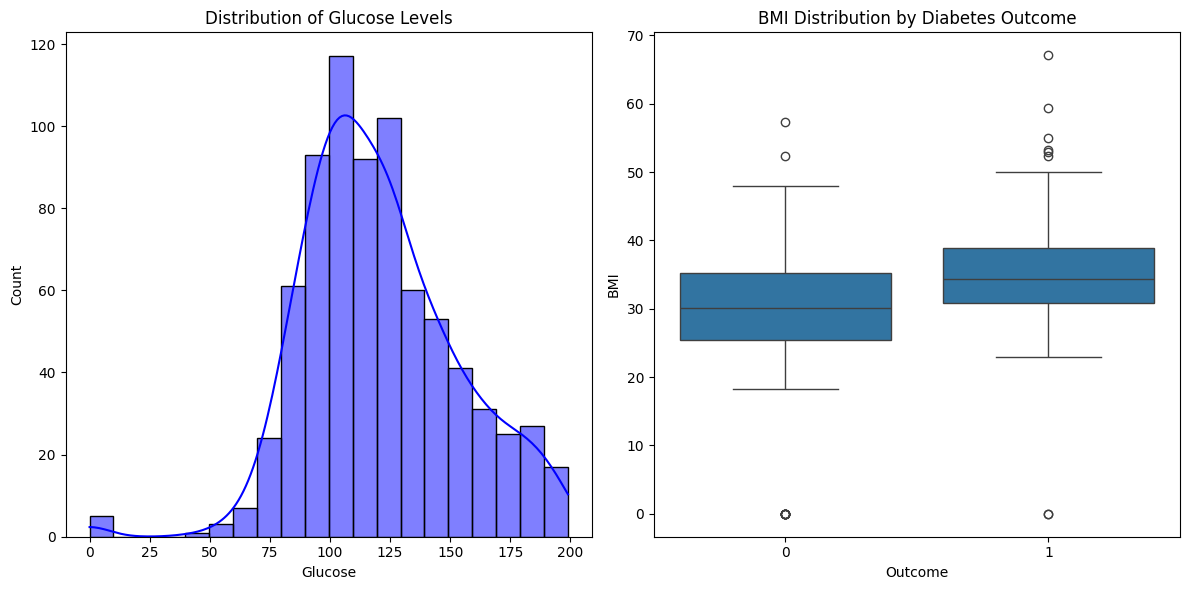

In [14]:
# Step 3: Data visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], bins=20, kde=True, color='blue')
plt.title('Distribution of Glucose Levels')

plt.subplot(1, 2, 2)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Outcome')

plt.tight_layout()
plt.show()

In [15]:
# Step 4: Basic statistics
print("Mean Glucose level:", df['Glucose'].mean())
print("Median Age:", df['Age'].median())
print("Correlation between Glucose and BMI:")
print(df[['Glucose', 'BMI']].corr())

Mean Glucose level: 120.81554677206852
Median Age: 29.0
Correlation between Glucose and BMI:
          Glucose       BMI
Glucose  1.000000  0.224216
BMI      0.224216  1.000000


In [16]:
# Step 5: Optional - Predictive modeling (Logistic Regression example)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
# Prepare data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Predict on test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7960526315789473
Confusion Matrix:
[[87 10]
 [21 34]]


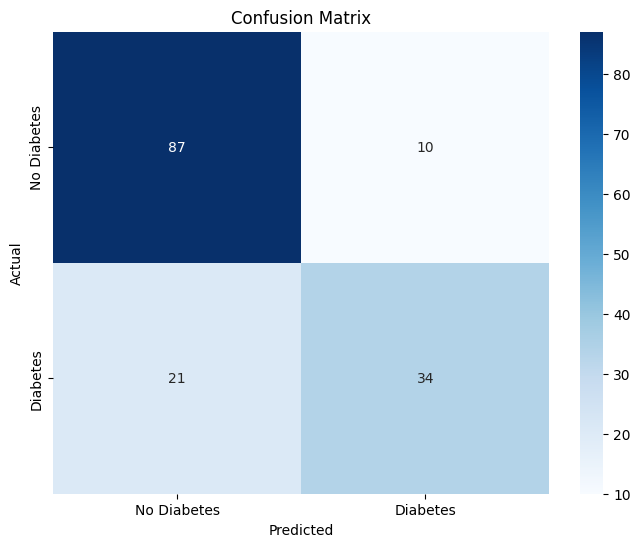

In [22]:
# Visualize confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()